<a href="https://colab.research.google.com/github/Shrey-Viradiya/ML/blob/master/Practicals/Practical4/Prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shrey Viradiya
# 18BCE259

In [1]:
import numpy as np
import sklearn.datasets as skd
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Simple and Multiple Linear Regression using Gradient Descent - Regularization**

In [2]:
np.random.seed(259)

### Gradient Descent

In [3]:
X, y = skd.load_boston(return_X_y=True)
X, y = shuffle(X, y, random_state = 259)
X = scale(X)
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
X_new = np.zeros(shape=(X.shape[0], X.shape[1] + 1))
X_new[:,0] = np.ones(shape = (1,X.shape[0]))
X_new[:,1:] = X
X = X_new

In [4]:
X_train = X[:400,:]
y_train = y[:400]
X_test = X[400:,:]
y_test = y[400:]

In [5]:
# epochs
n_iter = 500

# Learning Rate
LR = 0.01

lamb = 25

In [6]:
Reg = True

In [7]:
a, b = X_train.shape
thetas = np.random.uniform(0,1, size = (b))

In [8]:
thetas

array([0.69021991, 0.1008456 , 0.26613551, 0.87542591, 0.70853013,
       0.86330125, 0.8109315 , 0.60505036, 0.87763296, 0.28165856,
       0.71834225, 0.29260093, 0.4753621 , 0.85687412, 0.34886775,
       0.25221883, 0.61678522, 0.27532607, 0.49236053, 0.65953064,
       0.73213266, 0.11683407, 0.2180742 , 0.17850033, 0.95862598,
       0.45963384, 0.949563  , 0.36934759, 0.00109725, 0.88731442,
       0.83235006, 0.8913274 , 0.7866639 , 0.04841221, 0.91773111,
       0.88973534, 0.3029234 , 0.67365222, 0.32159491, 0.28089862,
       0.25030062, 0.40896302, 0.28325708, 0.23109149, 0.79554694,
       0.35680547, 0.91925181, 0.96868422, 0.2908304 , 0.767843  ,
       0.00755488, 0.8288577 , 0.87543584, 0.56464227, 0.70589323,
       0.36361326, 0.18601859, 0.16220464, 0.84466556, 0.6836021 ,
       0.35130769, 0.07413768, 0.92322874, 0.10027007, 0.74150636,
       0.7469742 , 0.41491431, 0.7512306 , 0.41813105, 0.59088495,
       0.4645193 , 0.22328287, 0.81294101, 0.64370748, 0.30661

In [9]:
mse_history = []

In [10]:
for i in range(n_iter):
    update = np.zeros(shape=(b))
    y_predicted = np.dot(X_train, thetas)
    error = y_predicted - y_train
    for f in range(b):
        update[f] = np.sum(error * ((X_train.T)[f]))
    if Reg:
        thetas[0] = thetas[0] - (LR/a) * update[0]
        thetas[1:] = thetas[1:] * ((1-(lamb*LR/a)) - (LR/a) * update[1:])
    else:
        thetas = thetas - (LR/(2*a)) * update
    mse_history.append(mean_squared_error (y_true= y_test, y_pred= np.dot(X_test, thetas)))

In [11]:
thetas

array([5.94116370e+00, 1.26395034e+01, 1.76328895e-03, 1.23641329e+00,
       2.81350661e-03, 1.06785962e-01, 5.49162691e-04, 4.35924940e+00,
       6.66501734e-03, 9.05252503e-01, 2.65715112e-03, 9.52607800e-05,
       1.67364255e-02, 3.36345150e+00, 2.92143589e-05, 2.06617981e-05,
       1.10794630e+00, 1.36214725e-01, 1.06240247e+00, 8.71252755e-02,
       8.97595194e-02, 3.34995261e-02, 9.01581206e-01, 1.44851198e-02,
       3.01772425e-01, 1.18020312e-01, 9.53558454e-03, 4.40815520e-02,
       1.47219178e-01, 5.39617341e-01, 5.44914471e-01, 4.96386266e-01,
       1.18160562e+00, 1.32331301e-02, 1.04003281e+00, 1.51438958e+00,
       3.43716775e-01, 4.24623561e-01, 4.46604894e-01, 3.68843734e-01,
       6.75839961e-01, 1.71696738e-01, 1.87412501e-01, 1.02403007e-02,
       5.65812056e-01, 5.21472490e-01, 6.37061560e-01, 3.19670057e-01,
       1.32032047e-02, 6.42420517e-02, 1.87948043e-03, 2.87062886e-01,
       9.80960842e-03, 5.89709642e-03, 4.80196856e-01, 2.84976287e-01,
      

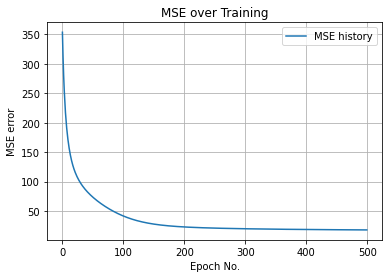

In [12]:
plt.plot(mse_history, label='MSE history')
plt.title("MSE over Training")
plt.ylabel('MSE error')
plt.xlabel('Epoch No.')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
y_tp = np.dot(X_test, thetas)

In [14]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

3.0534872360650733

In [15]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

17.846977698628418

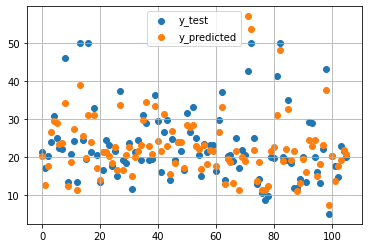

In [16]:
plt.scatter(y = y_test, x = range(len(y_test)), label = 'y_test')
plt.scatter(y = y_tp, x = range(len(y_test)), label = 'y_predicted')
plt.legend()
plt.grid(True)
plt.show()

**Plotting MSE for different Lambda**

In [17]:
def run_regressor(n_iter, i):
    lamb = 25
    LR = i
    thetas = np.random.uniform(0,1, size = (b))
    mse_history = []
    for i in range(n_iter):
        update = np.zeros(shape=(b))
        y_predicted = np.dot(X_train, thetas)
        error = y_predicted - y_train
        for f in range(b):
            update[f] = np.sum(error * ((X_train.T)[f]))
        if Reg:
            thetas[0] = thetas[0] - (LR/a) * update[0]
            thetas[1:] = thetas[1:] * ((1-(lamb*LR/a)) - (LR/a) * update[1:])
        else:
            thetas = thetas - (LR/(2*a)) * update
        mse_history.append(mean_squared_error (y_true= y_test, y_pred= np.dot(X_test, thetas)))
    return mse_history

In [18]:
mse_errors = []

for i in np.array([0.01,0.02,0.03]):
    print(i)
    mse_errors.append([i,run_regressor(100,i)])

0.01
0.02
0.03


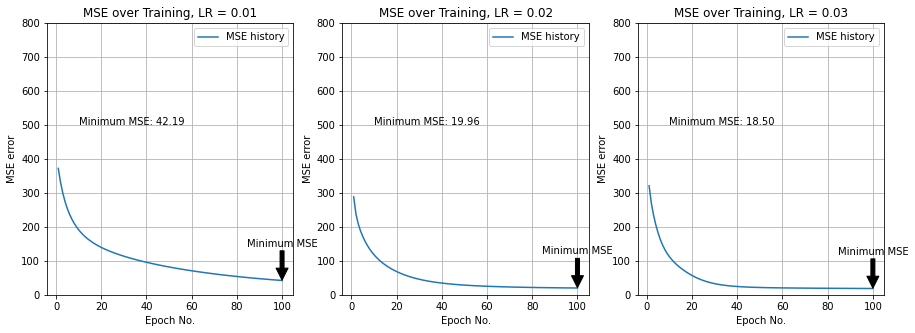

In [19]:
plt.figure(figsize=(15,5))
for _ in range(1,4):
    plt.subplot(1,3,_)
    plt.plot(range(1,101),mse_errors[_-1][1], label='MSE history')
    min = np.argmin(mse_errors[_-1][1])
    plt.annotate('Minimum MSE',
             xy=(min+1, mse_errors[_-1][1][min]),
             xytext=(min+1, mse_errors[_-1][1][min] + 100),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.text(10,500,"Minimum MSE: {:.2f}".format(mse_errors[_-1][1][min]))
    plt.title(f"MSE over Training, LR = {mse_errors[_-1][0]}")
    plt.ylabel('MSE error')
    plt.xlabel('Epoch No.')
    plt.ylim(0,800)
    plt.grid(True)
    plt.legend()
# plt.tight_layout(pad=3.0)

### Normal Equation

Normal Eqaution:
$θ =(X^T X  +  \lambda * L)^{-1} X^T y$

In [20]:
lamb

25

In [21]:
SpecDiag = np.identity(b)
SpecDiag[0][0] = 0

In [22]:
try:
    theta_best = np.linalg.inv(X_train.T.dot(X_train) + lamb * SpecDiag).dot(X_train.T).dot(y_train)
except np.linalg.LinAlgError as err:
    theta_best = np.linalg.pinv(X_train.T.dot(X_train) + lamb * SpecDiag ).dot(X_train.T).dot(y_train)

In [23]:
theta_best

array([ 2.07235272e+01,  1.22812075e-11, -1.66597441e-01, -6.50709583e-02,
       -1.82975341e-01,  8.22726180e-02, -6.15493403e-01,  3.01204196e+00,
       -7.53621078e-01, -1.63091371e+00,  4.63910076e-01, -9.69874242e-01,
       -8.06986652e-01,  4.56920251e-01, -2.87272542e+00,  5.65879218e-02,
        1.08015460e-01,  4.10536744e-02,  1.11995586e+00, -2.84182577e-01,
        5.34001448e-01,  9.11416578e-02,  2.54425009e-01, -5.73221520e-01,
        1.11215206e-01, -3.98196932e-02, -1.04224619e-01,  3.02854360e-01,
        2.66741746e-01, -1.81292305e-01,  3.23902966e-01,  2.30467940e-01,
        1.19958929e-01,  6.21048469e-02, -6.87700951e-02,  8.96344197e-03,
        4.45172801e-01,  9.02534550e-02,  7.56711674e-02, -1.22741036e-01,
        3.81376657e-01,  1.22887754e-01,  6.36122201e-01,  3.34595987e-01,
        4.83196330e-01,  5.03864657e-01,  2.02220020e-02,  3.63453773e-02,
       -3.61633828e-01,  7.64039749e-02, -5.98705438e-01,  2.79381298e-01,
       -8.39450430e-01, -

In [24]:
y_tp = np.dot(X_test, theta_best)

In [25]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

2.161982008970432

In [26]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

7.860982246996043